<h1 align="center">BlenderMapDEM Workflow Demonstration</h3>

# What is this File?
This file is meant to be used as a demonstration showing how to utilize the functions within this `BlenderMapDEM` package in a cohesive manner in order to fetch DEM data of any extent and render it using Blender.

The demonstration seen in this file assumes that the package has already been installed properly as specified in the [installation]() section of the main `README.md` file. This process entails installing the package through git and copying the `renderDEM.py` file to Blender's module folder.

# Workflow Demonstration
The workflow for using these functions can be divided into two stages. In the first stage you fetch a .geotiff image and perform geospatial operations on it that make use of its geographic metadata. In the second stage you convert this .geotiff into an image and prepare it for rendering inside Blender.

Keep in mind that while the process demonstrated here seems long and tedious, all these functions could be placed in one python file (or jupyter notebook) to run one after the other and all a user would have to do is specify a new extent to be fetched to get DEM images for different locations.

## Stage 1: Fetching .geotiff DEM Image

Begin by importing `BlenderMapDEM` and use `fetchDEM()` to get a .geotiff raster image of a chosen DEM extent saved to a specified directory. All directories within this demonstration will be relative to this `demo/` folder within the repository.
    
This .geotiff file, while not viewable in standard image editors and Blender at this stage, is able be manipulated and explored using geospatial operations that make use of its metadata.



In [2]:
# Import package
from BlenderMapDEM import *

In [2]:
# Get DEM map using fetchDEM()
fetchDEM(north_bound = 13.35,
         south_bound = 13.04,
         east_bound = -59.40,
         west_bound = -59.68,
         API_Key = '7da2375367b589517231f8fee1ae6b7c', # Input API key
         dataset = 'SRTMGL1', # Specify DEM dataset, in this case SRTM 30m resolution
         output_dir = './data/BarbadosDEM.tif') # Specify output directory for map

This .geotiff DEM file can now be opened in GIS software, however there is still work to be done to prepare the DEM for input into Blender.

![alt text](imgs/qgis.png "DEM openned in QGIS")


(Optional) use the generated .geotiff image to perform a variety of tasks to manipulate or better understand the data such as:
   
- Use `plotDEM()` to quickly visualize the data to get a general overview
- Use `describeDEM()` to describe the data and display key information
- Use `clipDEM()` to clip a section of the .geotiff according to shapefile geometry
- Use `reprojectDEM()` to reproject .geotiff to a different EPSG crs

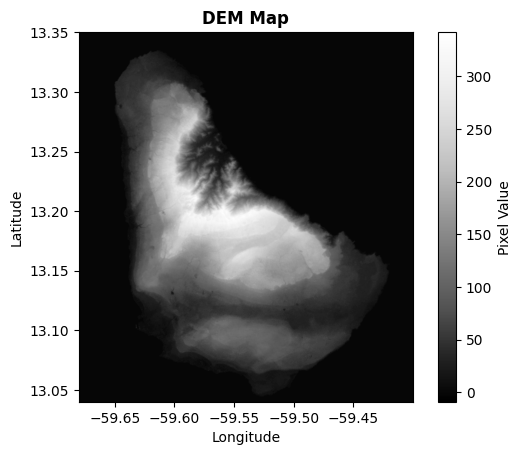

In [3]:
# Using plotDEM() to get a general overview of the DEM file visually
plotDEM(geotiff_dir = './data/BarbadosDEM.tif')

In [4]:
# Using describeDEM() to get key information about the DEM file
describeDEM(geotiff_dir = './data/BarbadosDEM.tif')

{'min pixel value': -9, 'max pixel value': 342}

## Stage 2: Converting .geotiff to Image and Rendering using Blender

While you could open up the DEM .geotiff file in any GIS software and export as an image, this is tedious and requires extra effort for a task that could be automated!

Use `geotiffToImage()` to convert the .geotiff DEM file into an image format that is readable by Blender


In [5]:
# Using geotiffToImage() to generate viewable image file from .geotiff DEM file
geotiffToImage(geotiff_dir = './data/BarbadosDEM.tif',
               output_dir = './data/BarbadosDEM_image.png')

Now we have an an image that is able to be opened by non-GIS programs (such as Blender)!

<img src="./imgs/openable_image.png" alt= “” width="50%" height="50%">

(Optional) use `simplifyDEM()` to downscale the image file to a lower resolution which lessens the resource requirements of your computer when rendering an image (a 2000x2000 pixel image is easier to render than a 5000x5000 pixel image)

Ideally you should not use this function to retain the highest quality however it can be helpful depending on the computer to speed up render times.

In [6]:
# Using simplifyDEM() to downscale DEM image file to lower resolution
simplifyDEM(dem_dir = './data/BarbadosDEM_image.png',
            output_dir = './data/BarbadosDEM_image_downscaled.png',
            reduction_factor = 2) # This result in an image with half the original resolution

Now we have a downscaled image with half the resolution of the original file generated by the `geotiffToImage()` function. This file will not be used to be fed into Blender because the normal DEM image already has a quite small resolution, this was just done for demonstration.

![alt text](imgs/downscaled_image.png "Downscaled DEM image")

We are finally ready to feed our prepared DEM image into Blender!

### Rendering using the `renderDEM()` Function
The `renderDEM()` function uses the `subprocess` module to automate the need to run Blender using the terminal by telling Blender to run the code within the `renderDEM.py` file which was added to Blender's modules folder. The only thing this function needs is for you to specify the path to the `blender.exe` file within the `blender_dir` parameter.

The following code will use the `renderDEM()` function to render a hillshade map using the default stylistic and quality parameters:

In [5]:
# Specifying paths of blender.exe, input DEM image, and output rendered image
blender = 'C:/Program Files/Blender Foundation/Blender 3.4/blender.exe'
DEM =  'C:/Home/Documents/BlenderMapDEM/demo/data/BarbadosDEM_image.png'
output = 'C:/Home/Documents/BlenderMapDEM/demo/data/render.png'

# Use renderDEM to run blender from within this python script
renderDEM(blender_dir = blender, dem_dir = DEM, output_dir = output)

CompletedProcess(args='C:/Program Files/Blender Foundation/Blender 3.4/blender.exe', returncode=0)

This render was done with very minimal quality settings and it still looks great!

![alt text](data/Barbados_render.png "Final render")